### Import the relevant libraries

In [0]:
import torch
from torch import nn
from torch import optim
from torchvision import datasets
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
import numpy as np
import torch.nn.functional as F
import copy

### Load the data

In [2]:
train_loader = torch.utils.data.DataLoader(
      datasets.MNIST('data',
                      train=True,
                      download=True,
                      transform=transforms.Compose([
                         transforms.ToTensor(),
                         transforms.Normalize((0.1307,), (0.3081,))
                     ])),
      batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(
      datasets.MNIST('data',
                      train=False,
                      download=True,
                      transform=transforms.Compose([
                         transforms.ToTensor(),
                         transforms.Normalize((0.1307,), (0.3081,))
                     ])),
      batch_size=128, shuffle=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


### Define the model architecture

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [0]:
class Model(nn.Module):

  def __init__(self):
    super().__init__()

    n_hidden = 1024

    self.l1 = nn.Linear(784, n_hidden)
    self.l2 = nn.Linear(n_hidden, n_hidden)
    self.l3 = nn.Linear(n_hidden, n_hidden)
    self.l4 = nn.Linear(n_hidden, n_hidden)
    self.l5 = nn.Linear(n_hidden, n_hidden)
    self.l6 = nn.Linear(n_hidden, n_hidden)
    self.l7 = nn.Linear(n_hidden, 10)

    # self.dropout = nn.Dropout(0.2)
  
  def forward(self, x):
    x = F.relu(self.l1(x))
    x = F.dropout(x)
    x = F.relu(self.l2(x))
    x = F.dropout(x)
    x = F.relu(self.l3(x))
    x = F.dropout(x)
    x = F.relu(self.l4(x))
    x = F.dropout(x)
    x = F.relu(self.l5(x))
    x = F.dropout(x)
    x = F.relu(self.l6(x))
    x = F.dropout(x)
    x = self.l7(x)

    return x

In [0]:
model = Model()

In [0]:
model = model.to(device)

In [7]:
print(model)

Model(
  (l1): Linear(in_features=784, out_features=1024, bias=True)
  (l2): Linear(in_features=1024, out_features=1024, bias=True)
  (l3): Linear(in_features=1024, out_features=1024, bias=True)
  (l4): Linear(in_features=1024, out_features=1024, bias=True)
  (l5): Linear(in_features=1024, out_features=1024, bias=True)
  (l6): Linear(in_features=1024, out_features=1024, bias=True)
  (l7): Linear(in_features=1024, out_features=10, bias=True)
)


### Define the loss and optimizer

In [0]:
criterion = nn.CrossEntropyLoss()

In [0]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Train the model

In [10]:
epochs = 20
for e in range(epochs):
    # loss for every epoch
    running_loss = 0
    for images, labels in train_loader:
      images = images.to(device)
      labels = labels.to(device)

      images = images.view(images.shape[0], -1)

      # make the gradients 0 for a new batch
      optimizer.zero_grad()

      # calculate the outputs
      output = model(images)

      # calculate the loss
      loss = criterion(output, labels)

      # calculate the gradients
      loss.backward()

      # update the weights
      optimizer.step()
        
      running_loss += loss.item()

    print(f"Loss for epoch {e}: {running_loss/len(train_loader)}")

Loss for epoch 0: 0.6163255866847313
Loss for epoch 1: 0.29443212765366283
Loss for epoch 2: 0.2608007381179694
Loss for epoch 3: 0.22701774969665225
Loss for epoch 4: 0.2184638230642403
Loss for epoch 5: 0.214267202484201
Loss for epoch 6: 0.20294847263932736
Loss for epoch 7: 0.19419156807635637
Loss for epoch 8: 0.18487978893826637
Loss for epoch 9: 0.19013424054074135
Loss for epoch 10: 0.18808299835239137
Loss for epoch 11: 0.17935319501422106
Loss for epoch 12: 0.18296682483542448
Loss for epoch 13: 0.17323190950031983
Loss for epoch 14: 0.19125369749168977
Loss for epoch 15: 0.17263144980282036
Loss for epoch 16: 0.1737458509271905
Loss for epoch 17: 0.17531809120623668
Loss for epoch 18: 0.1880974323113463
Loss for epoch 19: 0.18732999670289474


In [11]:
model.cpu()

Model(
  (l1): Linear(in_features=784, out_features=1024, bias=True)
  (l2): Linear(in_features=1024, out_features=1024, bias=True)
  (l3): Linear(in_features=1024, out_features=1024, bias=True)
  (l4): Linear(in_features=1024, out_features=1024, bias=True)
  (l5): Linear(in_features=1024, out_features=1024, bias=True)
  (l6): Linear(in_features=1024, out_features=1024, bias=True)
  (l7): Linear(in_features=1024, out_features=10, bias=True)
)

### Test the model

In [0]:
X_test = torch.Tensor()
y_test = torch.Tensor()
for images, labels in test_loader:
      images = images.view(images.shape[0], -1)
      X_test = torch.cat((X_test, images))
      y_test = torch.cat((y_test, labels.float()))

In [0]:
def get_accuracy(mod):
  """
  Takes a model and runs the test data through
  it to calculate the accuracy
  """
  # run the test data through the model
  preds = mod(X_test)

  # apply softmax on it
  preds = F.softmax(preds, dim=1)

  # finally get the predictions
  prob, pred = torch.max(preds, 1)

  # finally calculate and return the accuracy
  accuracy = (pred.float() == y_test).float().mean()
  accuracy = accuracy * 100
  return accuracy

In [14]:
get_accuracy(model)

tensor(95.2200)

### 1.5 Apply SVD on model and plot accuracies

In [0]:
def apply_svd(weights, d):
  """
  Applies svd on a given layers weights and given d
  """
  u,s,v = torch.svd(weights)
  s = torch.diag(s)
  # print(u.shape, v.shape, s.shape)
  u = u[:,:d]
  s = s[:d,:d]
  v = v[:,:d]
  # print(u.shape, v.shape, s.shape)
  out = torch.mm(torch.mm(u, s), v.t())
  return out

In [16]:
o = apply_svd(model.l1.weight, 20)
o.shape

torch.Size([1024, 784])

In [17]:
for name, layer in list(model.named_children())[:-1]:
  print(name)

l1
l2
l3
l4
l5
l6


In [0]:
ds = [10,20,50,100,200]
def compressed_models():
  """
  Create a bunch of models by applying svd to every layer
  of the model based on the value of d. Print the accuracy
  using the new models
  """
  models = {}
  mod_no = 0
  accuracies = []

  # print("Accuracy before svd: ", get_accuracy(model))
  
  for d in ds:
    # make a copy of the original model
    m = copy.deepcopy(model)
    # go through all its layers (except the last one)
    for name, layer in list(m.named_children())[:-1]:
      # apply svd on every layer
      new_weight = apply_svd(layer.weight, d)
      # and modify the layers weight accordingly
      layer.weight.data = new_weight
    # save the model
    acc = get_accuracy(m)
    accuracies.append(acc)
    models['model_' + str(mod_no)] = m
    mod_no += 1
    # print("Accuracy after svd for d =",d, "is", acc)
  return ds, accuracies

In [0]:
ds, accuracies = compressed_models()

In [0]:
ds.append(X_test.shape[1])
accuracies.append(get_accuracy(model))

In [21]:
ds, accuracies

([10, 20, 50, 100, 200, 784],
 [tensor(62.5300),
  tensor(85.2400),
  tensor(92.7300),
  tensor(94.7700),
  tensor(95.1300),
  tensor(95.4000)])

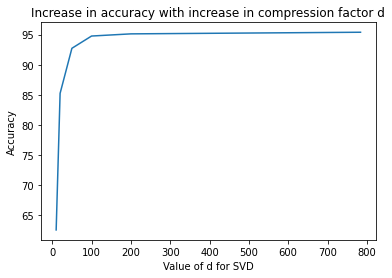

In [22]:
plt.plot(ds, accuracies)
plt.xlabel("Value of d for SVD")
plt.ylabel("Accuracy")
plt.title("Increase in accuracy with increase in compression factor d")
plt.show()

### 1.6 Approach 1, train compressed model

In [0]:
def var_svd(weights, d):
  u,s,v = torch.svd(weights)
  s = torch.diag(s)
  u = u[:,:d]
  s = s[:d,:d]
  v = v[:,:d]
  u_hat = u
  v_hat = torch.mm(s, v.t())
  return u_hat, v_hat

In [0]:
d = 20
count = 0
new_params = []
for name, layer in model.named_children():
  u_hat, v_hat = var_svd(layer.weight, d)
  new_params.append([u_hat,v_hat])

In [0]:
class SVD_Model(nn.Module):

  def __init__(self):
    super().__init__()
    self.u1 = nn.Parameter(torch.Tensor(new_params[0][0]).to(device))
    self.v1 = nn.Parameter(torch.Tensor(new_params[0][1]).to(device))
    self.b1 = nn.Parameter(torch.randn(self.u1.shape[0]).to(device))
    
    self.u2 = nn.Parameter(torch.Tensor(new_params[1][0]).to(device))
    self.v2 = nn.Parameter(torch.Tensor(new_params[1][1]).to(device))
    self.b2 = nn.Parameter(torch.randn(self.u2.shape[0]).to(device))
    
    self.u3 = nn.Parameter(torch.Tensor(new_params[2][0]).to(device))
    self.v3 = nn.Parameter(torch.Tensor(new_params[2][1]).to(device))
    self.b3 = nn.Parameter(torch.randn(self.u3.shape[0]).to(device))
    
    self.u4 = nn.Parameter(torch.Tensor(new_params[3][0]).to(device))
    self.v4 = nn.Parameter(torch.Tensor(new_params[3][1]).to(device))
    self.b4 = nn.Parameter(torch.randn(self.u4.shape[0]).to(device))
    
    self.u5 = nn.Parameter(torch.Tensor(new_params[4][0]).to(device))
    self.v5 = nn.Parameter(torch.Tensor(new_params[4][1]).to(device))
    self.b5 = nn.Parameter(torch.randn(self.u5.shape[0]).to(device))
    
    self.u6 = nn.Parameter(torch.Tensor(new_params[5][0]).to(device))
    self.v6 = nn.Parameter(torch.Tensor(new_params[5][1]).to(device))
    self.b6 = nn.Parameter(torch.randn(self.u6.shape[0]).to(device))
    
    self.u7 = nn.Parameter(torch.Tensor(new_params[6][0]).to(device))
    self.v7 = nn.Parameter(torch.Tensor(new_params[6][1]).to(device))
    self.b7 = nn.Parameter(torch.randn(self.u7.shape[0]).to(device))
  
  def forward(self, x):
    w1 = torch.mm(self.u1, self.v1)
    x = F.relu(torch.mm(x, w1.T) + self.b1)
    x = F.dropout(x)

    w2 = torch.mm(self.u2, self.v2)
    x = F.relu(torch.mm(x, w2.T) + self.b2)
    x = F.dropout(x)

    w3 = torch.mm(self.u3, self.v3)
    x = F.relu(torch.mm(x, w3.T) + self.b3)
    x = F.dropout(x)

    w4 = torch.mm(self.u4, self.v4)
    x = F.relu(torch.mm(x, w4.T) + self.b4)
    x = F.dropout(x)

    w5 = torch.mm(self.u5, self.v5)
    x = F.relu(torch.mm(x, w5.T) + self.b5)
    x = F.dropout(x)

    w6 = torch.mm(self.u6, self.v6)
    x = F.relu(torch.mm(x, w6.T) + self.b6)
    x = F.dropout(x)

    w7 = torch.mm(self.u7, self.v7)
    x = torch.mm(x, w7.T) + self.b7
    return x


In [0]:
svd_model = SVD_Model()

In [0]:
svd_model = svd_model.to(device)

In [0]:
X_test = X_test.to(device)
y_test = y_test.to(device)

In [29]:
# accuracy before training
get_accuracy(svd_model)

tensor(66.0600, device='cuda:0')

In [0]:
criterion1 = nn.CrossEntropyLoss()

In [0]:
optimizer1 = optim.Adam(svd_model.parameters(), lr=0.001)

In [32]:
epochs = 10
for e in range(epochs):

    running_loss = 0
    for images, labels in train_loader:
      images = images.to(device)
      labels = labels.to(device)

      images = images.view(images.shape[0], -1)
      optimizer1.zero_grad()
      output1 = svd_model(images)
      loss1 = criterion1(output1, labels)
      # print(svd_model.u1.data)
      loss1.backward(retain_graph=True)
      optimizer1.step()
        
      running_loss += loss1.item()

    print(f"Loss for epoch {e}: {running_loss/len(train_loader)}")

Loss for epoch 0: 0.2798076334522604
Loss for epoch 1: 0.24480863810697598
Loss for epoch 2: 0.21859280963632852
Loss for epoch 3: 0.2122929796401753
Loss for epoch 4: 0.20878058526593485
Loss for epoch 5: 0.1987407830621261
Loss for epoch 6: 0.19839296894255223
Loss for epoch 7: 0.1843674760987001
Loss for epoch 8: 0.1779479184813464
Loss for epoch 9: 0.18281392749549866


In [33]:
get_accuracy(svd_model)

tensor(95.6800, device='cuda:0')